# Analisis de Datos

Vamos a hacer un analisis de datos del repositorio https://github.com/rubences/Api_Casas_Apuestas.git

En primer lugar, vamos a analizar únicamente la base de datos, ya que el resto de ficheros csv no nos proporcionan la información suficiente como para analizarlos

## Extraer datos de la base de datos

Lo primero que vamos a hacer va a ser obtener las distintas tablas de la base de datos y almacenarlas una a una en archivos csv, haciendo uso de la clase GetDataFromDb. Importamos la clase, que se encuentra en el archivo getDataFromDb.py: 

In [31]:
from Analisis_Datos.Db.getDataFromDb import GetDataFromDb

In [32]:
analisis = GetDataFromDb('Api_Casas_Apuestas-main/bookmaker.db')

analisis.complete_bd()
for table in analisis.bd:
    df = analisis.get_data(table)
    analisis.csv_storage(df, f'Analisis_Datos/Db/csv/{table}.csv')

Vemos que se nos han creado archivos csv con los datos de las diferentes tablas de la base de datos. Ahora ya si estamos en condiciones de hacer un analisis de datos de cada tabla:

### Apuestas

Importamos las clases necesarias para el filtrado de datos y la regresion lineal:

In [33]:
from Analisis_Datos.filterData import FilterData
from Analisis_Datos.linear_Regression import Linear_regression

Comenzamos con el análisis:

In [34]:
filter = FilterData('Analisis_Datos/Db/csv/apuestas.csv') #Instanciamos la clase FilterData
print(filter.df) #Mostramos el dataframe

    Unnamed: 0  id                       fecha  monto  equipo_ganador_id  \
0            0   1  2021-12-15 01:08:30.211674  300.0                2.0   
1            1   2  2021-12-15 01:08:30.211674  300.0               29.0   
2            2   3  2021-12-15 01:35:34.965516  300.0                2.0   
3            3   4  2021-12-15 01:35:34.965516  300.0               29.0   
4            4   5  2021-12-15 01:35:34.965516  300.0                2.0   
5            5   6  2021-12-15 01:35:34.965516  300.0                2.0   
6            6   7  2021-12-15 01:35:34.965516  300.0               29.0   
7            7   8  2021-12-15 01:35:34.965516  300.0                NaN   
8            8   9  2021-12-15 01:37:11.843995  300.0                NaN   
9            9  10  2021-12-15 01:38:57.727163  300.0                NaN   
10          10  11  2021-12-15 01:39:50.795018  300.0                NaN   
11          11  12  2021-12-15 01:41:14.883910  300.0                NaN   
12          

Vemos que el dataframe contiene valores perdidos. Como no podemos eliminar dichos valores ya que perderíamos demasiada informacion, vamos a sustituirlos por el valor 0, siendo este valor el id para los equipos de los cuales se desconoce su ganador

In [35]:
filter.df.fillna(0, inplace=True) #Rellenamos los valores nulos con 0
print(filter.df) #Mostramos el dataframe

    Unnamed: 0  id                       fecha  monto  equipo_ganador_id  \
0            0   1  2021-12-15 01:08:30.211674  300.0                2.0   
1            1   2  2021-12-15 01:08:30.211674  300.0               29.0   
2            2   3  2021-12-15 01:35:34.965516  300.0                2.0   
3            3   4  2021-12-15 01:35:34.965516  300.0               29.0   
4            4   5  2021-12-15 01:35:34.965516  300.0                2.0   
5            5   6  2021-12-15 01:35:34.965516  300.0                2.0   
6            6   7  2021-12-15 01:35:34.965516  300.0               29.0   
7            7   8  2021-12-15 01:35:34.965516  300.0                0.0   
8            8   9  2021-12-15 01:37:11.843995  300.0                0.0   
9            9  10  2021-12-15 01:38:57.727163  300.0                0.0   
10          10  11  2021-12-15 01:39:50.795018  300.0                0.0   
11          11  12  2021-12-15 01:41:14.883910  300.0                0.0   
12          

A continuación vamos a obtener el diagrama de cajas y un histograma con los valores de cada columna para hacernos una idea de los valores atípicos de esta tabla, y posteriormente, vamos a hallar el porcentaje de estos ciertos valores con respecto a los otros datos:

       Unnamed: 0         id       monto  equipo_ganador_id    partido  \
count   21.000000  21.000000   21.000000          21.000000  21.000000   
mean    10.000000  11.000000  314.285714           6.666667   1.142857   
std      6.204837   6.204837   65.465367          11.186301   0.654654   
min      0.000000   1.000000  300.000000           0.000000   1.000000   
25%      5.000000   6.000000  300.000000           0.000000   1.000000   
50%     10.000000  11.000000  300.000000           2.000000   1.000000   
75%     15.000000  16.000000  300.000000           2.000000   1.000000   
max     20.000000  21.000000  600.000000          29.000000   4.000000   

         cliente      ganacia  
count  21.000000    21.000000  
mean   86.428571  1084.000000  
std     7.201190   524.906849  
min    55.000000   420.000000  
25%    88.000000   891.000000  
50%    88.000000   891.000000  
75%    88.000000   891.000000  
max    88.000000  2868.000000  


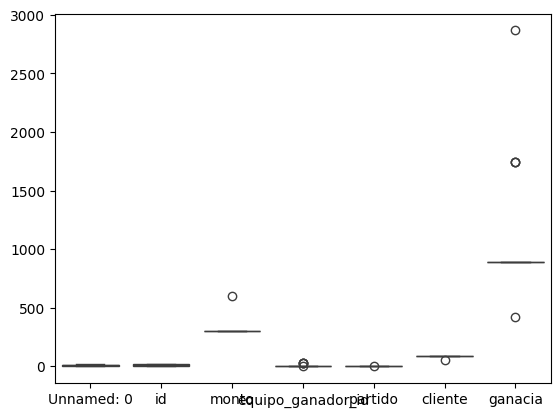

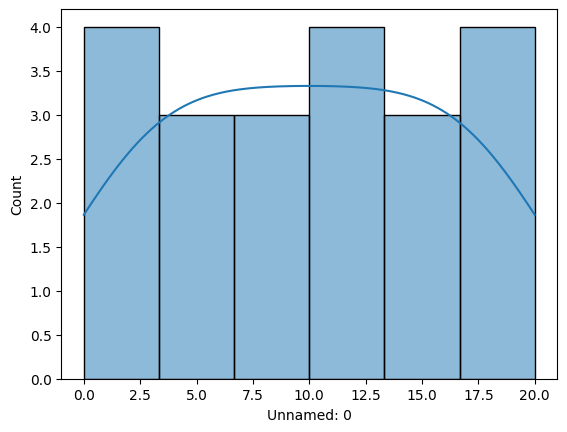

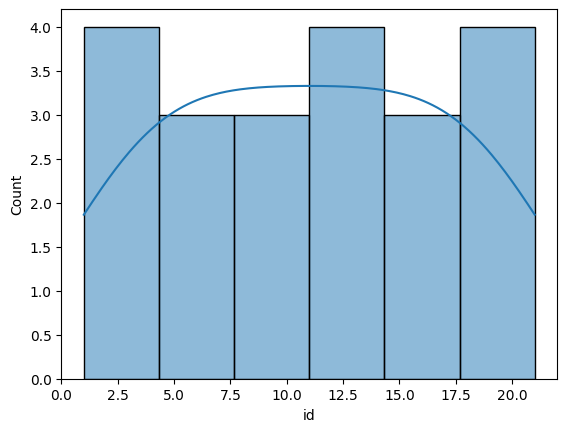

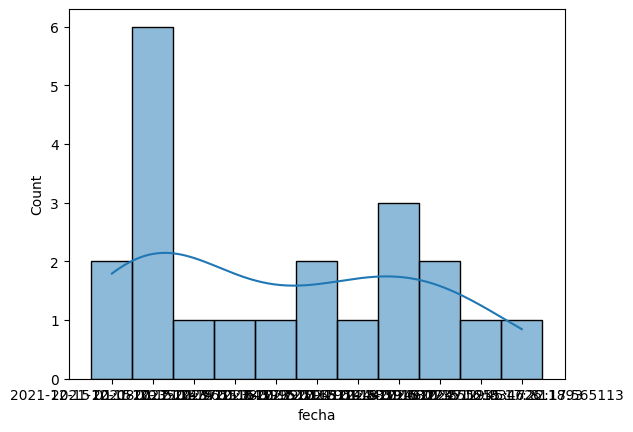

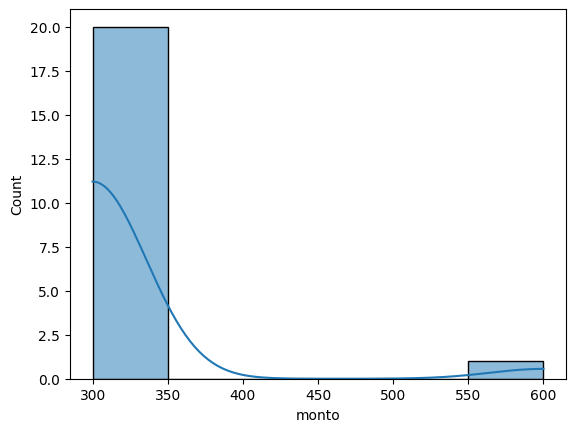

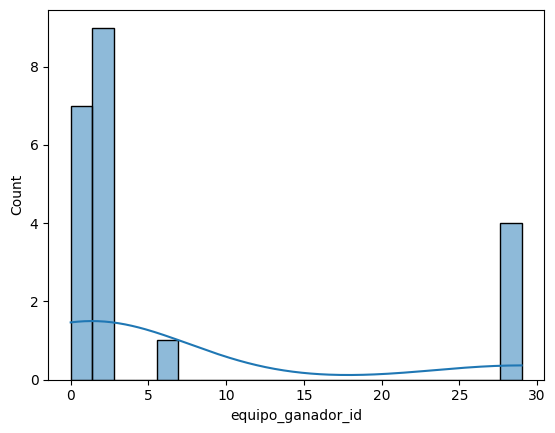

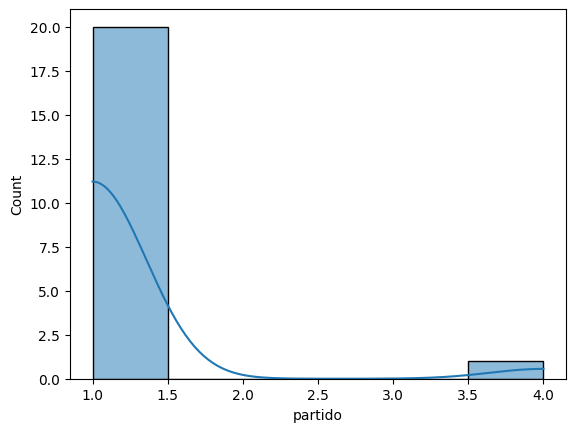

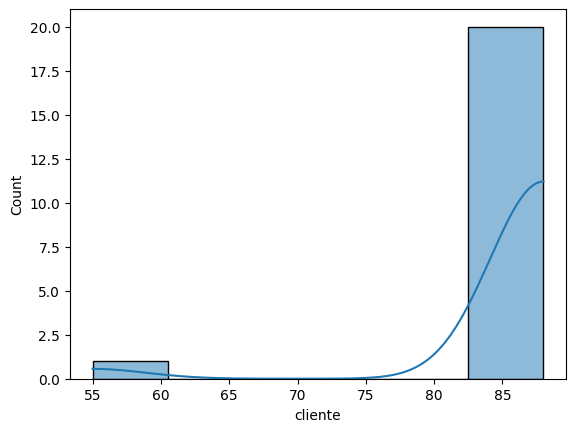

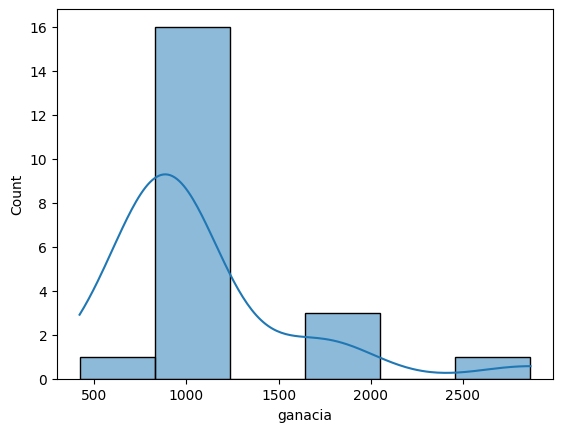

Unnamed: 0 :  0.0
id :  0.0
fecha :  0.0
monto :  4.761904761904762
equipo_ganador_id :  23.809523809523807
partido :  4.761904761904762
cliente :  4.761904761904762
ganacia :  23.809523809523807


In [36]:
print(filter.get_stats())
filter.get_boxplot(filter.df)
filter.get_histplot(filter.df)
for column in filter.df.columns:
    filter.atipic_values(column)
    print(column, ': ', filter.atipic_values_percentaje())

Vemos en el diagrama de cajas que la columna monto presenta un valor atípico, como podemos ver en el los porcentajes, ya que ese 4.76% representa que tenemos un valor atípico. De la misma manera, en los porcentajes, vemos que equipo_ganador_id y ganacia presentan un 23.80% de valores atípicos. En el caso del id no importa ya que es un identificador, y en el caso de la ganancia no podemos hacer nada ya que al tener muy pocos datos es normal presentar un mayor número de atípicos.

A continuacion vamos a analizar las relaciones entre las distintas variables para hacer una regresión lineal:

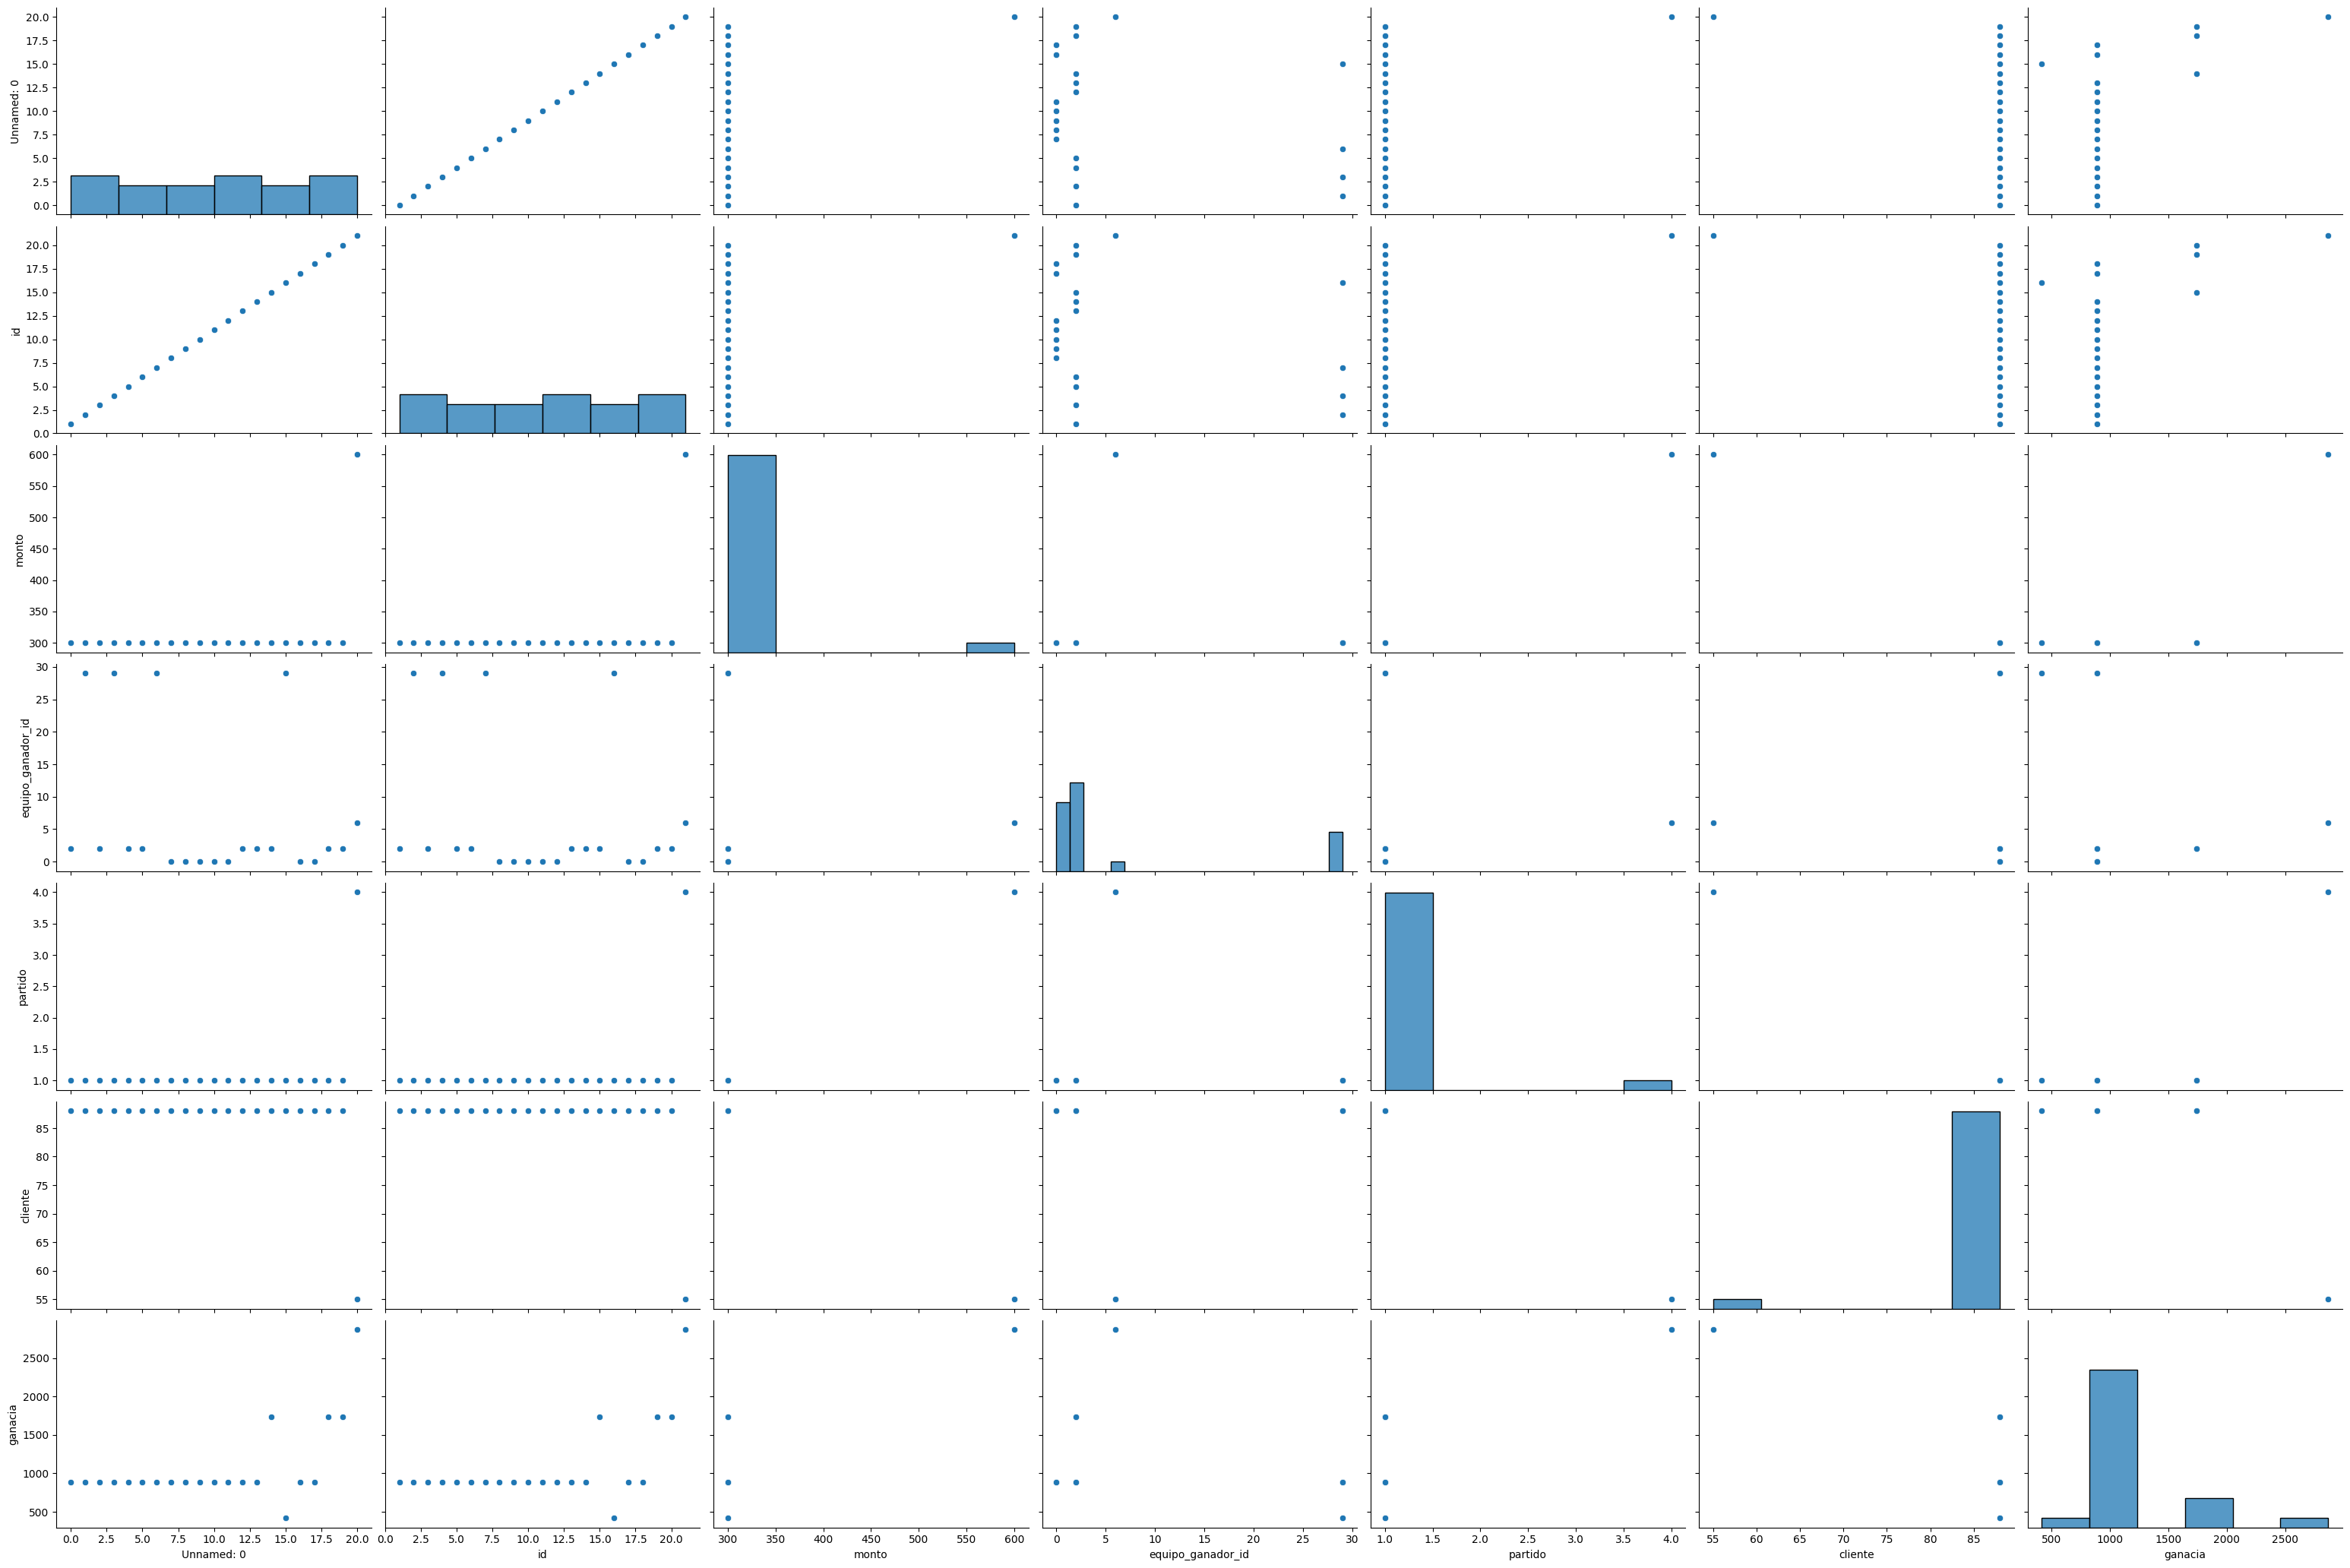

    Unnamed: 0  id  fecha  monto  equipo_ganador_id  partido  cliente  ganacia
0            0   1    NaN  300.0                2.0        1       88    891.0
1            1   2    NaN  300.0               29.0        1       88    891.0
2            2   3    NaN  300.0                2.0        1       88    891.0
3            3   4    NaN  300.0               29.0        1       88    891.0
4            4   5    NaN  300.0                2.0        1       88    891.0
5            5   6    NaN  300.0                2.0        1       88    891.0
6            6   7    NaN  300.0               29.0        1       88    891.0
7            7   8    NaN  300.0                0.0        1       88    891.0
8            8   9    NaN  300.0                0.0        1       88    891.0
9            9  10    NaN  300.0                0.0        1       88    891.0
10          10  11    NaN  300.0                0.0        1       88    891.0
11          11  12    NaN  300.0                0.0 

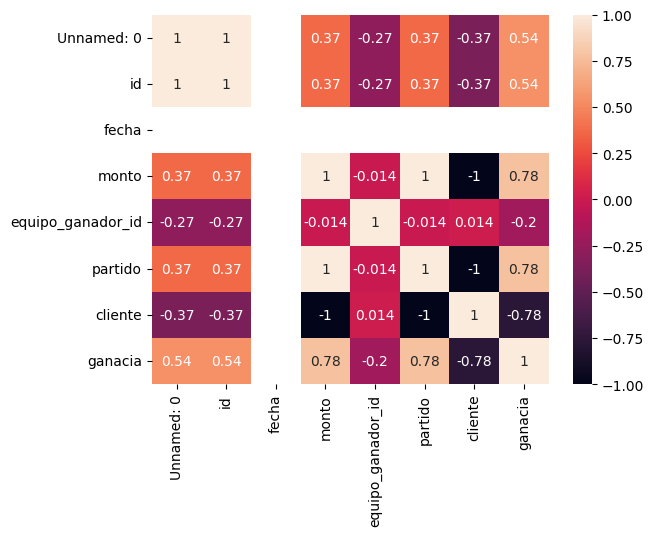

In [37]:
filter.get_pairplot(filter.df)
filter.df.drop('fecha', inplace=True, axis=1)
print(filter.numeric_transform())
filter.get_heatmap(filter.df)

Gracias al diagrama de pares vemos que no hay ninguna relación a simple vista entre las distintas variables, salvo la obvia relación entre el identificador y la columna unnamed, ya que en realidad son lo mismo 

Aunque no tenga sentido hacer una regresión lineal en este caso, vamos a hacer una regresión lineal entre la ganancia y el monton apostado, como ejemplo

Cabe destacar que hemos eliminado la columna fecha ya que no es de tipo numérico y no nos proporciona información relevante para la regresión

In [38]:
#Importamos la clase LinearRegression
from Analisis_Datos.linear_Regression import Linear_regression

In [39]:
linear_regression = Linear_regression(filter.df)
linear_regression.readyRegression('ganacia')
print(linear_regression.get_model_slopes())
linear_regression.plot_model_scopes()
linear_regression.plot_regression_model(filter.df['monto'])

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Vemos que el coeficiente de determinacion R cuadrado es 0.606, que no es el mejor para realizar una regresion lineal. Además esta regresión es muy pobre ya que no tenemos datos suficientes para llevarla a cabo adecuadamente 